In [1]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# Statistical plotting library we'll use
import seaborn as sns

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

In [3]:
#Import all files from raw data directory into a list
from os import listdir
path = 'C:/Users/anbra/Desktop/Single_Cell_MNTB/Data/'
gz_files = listdir(path)
print(len(gz_files))
print(gz_files[ :10])

296
['C1_A1.txt.gz', 'C1_A2.txt.gz', 'C1_A4.txt.gz', 'C1_A5.txt.gz', 'C1_B3.txt.gz', 'C1_B4.txt.gz', 'C1_B5.txt.gz', 'C1_B6.txt.gz', 'C1_C3.txt.gz', 'C1_C4.txt.gz']


In [4]:
#Make a cleaned list of file names without extension. Print the length to make sure you did not lost any files.
gz_files_prefix = [x.replace('.txt.gz', '') for x in gz_files]
print(gz_files_prefix)
print(len(gz_files_prefix))

['C1_A1', 'C1_A2', 'C1_A4', 'C1_A5', 'C1_B3', 'C1_B4', 'C1_B5', 'C1_B6', 'C1_C3', 'C1_C4', 'C1_D1', 'C1_D2', 'C1_D3', 'C1_D4', 'C1_D5', 'C1_D6', 'C1_E1', 'C1_E2', 'C1_E3', 'C1_E4', 'C1_E6', 'C1_F1', 'C1_F2', 'C1_F3', 'C1_F4', 'C1_F5', 'C1_F6', 'C1_G1', 'C1_G2', 'C1_G3', 'C1_H1', 'C1_H2', 'C1_H3', 'C1_H5', 'C2_A1', 'C2_A2', 'C2_A3', 'C2_A4', 'C2_A5', 'C2_A6', 'C2_A7', 'C2_B1', 'C2_B2', 'C2_B3', 'C2_B4', 'C2_B5', 'C2_B6', 'C2_B7', 'C2_C1', 'C2_C2', 'C2_C3', 'C2_C4', 'C2_C5', 'C2_C6', 'C2_C7', 'C2_D1', 'C2_D2', 'C2_D3', 'C2_D4', 'C2_D5', 'C2_D6', 'C2_D7', 'C2_E2', 'C2_E3', 'C2_E4', 'C2_E5', 'C2_E6', 'C2_E7', 'C2_F1', 'C2_F2', 'C2_F3', 'C2_F4', 'C2_F5', 'C2_F6', 'C2_F7', 'C2_G1', 'C2_G2', 'C2_G3', 'C2_G4', 'C2_G5', 'C2_G6', 'C2_G7', 'C2_H1', 'C2_H2', 'C2_H3', 'C2_H4', 'C2_H5', 'C2_H7', 'C3_A1', 'C3_A2', 'C3_A3', 'C3_A4', 'C3_A5', 'C3_A6', 'C3_A7', 'C3_B1', 'C3_B2', 'C3_B3', 'C3_B4', 'C3_B5', 'C3_B6', 'C3_C1', 'C3_C2', 'C3_C3', 'C3_C4', 'C3_C5', 'C3_C6', 'C3_D1', 'C3_D2', 'C3_D3', 'C3_D4', 

In [6]:
#Use gz_files list to loop through data and read. 
file_path = 'C:/Users/anbra/Desktop/Single_Cell_MNTB/Data/'
df_master = pd.DataFrame()
df_temp = pd.DataFrame()

colnames=['GeneID', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Counts']
for i in range(0,len(gz_files)):
    if i == 0:
        df_master = pd.read_csv(file_path + gz_files[i], header=0, skiprows=1, names=colnames, sep='\t', compression = 'gzip')
        df_master.insert(0, 'CellName', gz_files[i])
        df_master.drop('Start', 1, inplace=True)
        df_master.drop('End', 1, inplace=True)
        df_master.drop('Chr', 1, inplace=True)
        df_master.drop('Strand', 1, inplace=True)
    else:
        df_temp = pd.read_csv(file_path + gz_files[i], header=0, skiprows=1, names=colnames, sep='\t', compression = 'gzip')
        df_temp.insert(0, 'CellName', gz_files[i])
        df_temp.drop('Start', 1, inplace=True)
        df_temp.drop('End', 1, inplace=True)
        df_temp.drop('Chr', 1, inplace=True)
        df_temp.drop('Strand', 1, inplace=True)
        df_master = df_master.append(df_temp, ignore_index=True)
print(df_master.shape)
df_master.head()

(15429888, 4)


,CellName,GeneID,Length,Counts
0,C1_A1.txt.gz,4933401J01Rik,1070,0
1,C1_A1.txt.gz,Gm26206,110,0
2,C1_A1.txt.gz,Xkr4,6094,214
3,C1_A1.txt.gz,Gm18956,480,0
4,C1_A1.txt.gz,Gm37180,2819,454


In [7]:
df_master.tail()

,CellName,GeneID,Length,Counts
15429883,C5_H5.txt.gz,CR936839.2,636,0
15429884,C5_H5.txt.gz,CR936839.3,552,0
15429885,C5_H5.txt.gz,EC2,775,982
15429886,C5_H5.txt.gz,EC15,1027,42
15429887,C5_H5.txt.gz,EC18,1474,0


In [12]:
#save master dataframe to csv file. 
pd.DataFrame.to_csv(self = df_master, path_or_buf = "C:/Users/anbra/Desktop/Single_Cell_MNTB/Data/df_master.csv", sep = '\t')

In [13]:
#Get sum of all genes for each cell specified by each CountsIndex column. Length is 296 because there are 296 cells.
sum_of_counts = df_master.groupby('CellName').Counts.sum()
print(sum_of_counts)

CellName
C1_A1.txt.gz    2841651
C1_A2.txt.gz    2139750
C1_A4.txt.gz    1854389
C1_A5.txt.gz    2184134
C1_B3.txt.gz    2269718
C1_B4.txt.gz    1820098
C1_B5.txt.gz     427680
C1_B6.txt.gz    1223545
C1_C3.txt.gz    2209200
C1_C4.txt.gz    1753141
C1_D1.txt.gz    3967341
C1_D2.txt.gz    2047245
C1_D3.txt.gz    3419397
C1_D4.txt.gz    2572262
C1_D5.txt.gz     918919
C1_D6.txt.gz    6391536
C1_E1.txt.gz    2638149
C1_E2.txt.gz    1953206
C1_E3.txt.gz    2180359
C1_E4.txt.gz    2178564
C1_E6.txt.gz    6312688
C1_F1.txt.gz    4052297
C1_F2.txt.gz    3041659
C1_F3.txt.gz    1229788
C1_F4.txt.gz    2054438
C1_F5.txt.gz    2100854
C1_F6.txt.gz    6841282
C1_G1.txt.gz    3493457
C1_G2.txt.gz    3017293
C1_G3.txt.gz    2067819
                 ...   
C5_C5.txt.gz     156562
C5_C6.txt.gz     209318
C5_D1.txt.gz     120338
C5_D2.txt.gz     261910
C5_D3.txt.gz      84519
C5_D4.txt.gz     146160
C5_D5.txt.gz     142285
C5_D6.txt.gz     164052
C5_E1.txt.gz      78884
C5_E2.txt.gz     290644
C5_E3.t

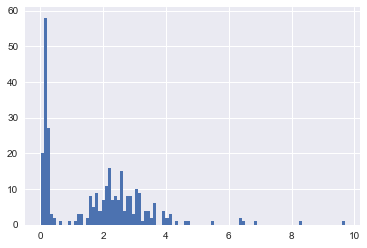

In [26]:
#Plot total counts. How do I add axis labels and export the figure as PDF 
counts_hist = plt.hist(sum_of_counts/1e6, bins=100)

In [28]:
#Find cells that fail total counts cutoff.
bad_cells_byCount = sum_of_counts < 25000
print(bad_cells_byCount)

CellName
C1_A1.txt.gz    False
C1_A2.txt.gz    False
C1_A4.txt.gz    False
C1_A5.txt.gz    False
C1_B3.txt.gz    False
C1_B4.txt.gz    False
C1_B5.txt.gz    False
C1_B6.txt.gz    False
C1_C3.txt.gz    False
C1_C4.txt.gz    False
C1_D1.txt.gz    False
C1_D2.txt.gz    False
C1_D3.txt.gz    False
C1_D4.txt.gz    False
C1_D5.txt.gz    False
C1_D6.txt.gz    False
C1_E1.txt.gz    False
C1_E2.txt.gz    False
C1_E3.txt.gz    False
C1_E4.txt.gz    False
C1_E6.txt.gz    False
C1_F1.txt.gz    False
C1_F2.txt.gz    False
C1_F3.txt.gz    False
C1_F4.txt.gz    False
C1_F5.txt.gz    False
C1_F6.txt.gz    False
C1_G1.txt.gz    False
C1_G2.txt.gz    False
C1_G3.txt.gz    False
                ...  
C5_C5.txt.gz    False
C5_C6.txt.gz    False
C5_D1.txt.gz    False
C5_D2.txt.gz    False
C5_D3.txt.gz    False
C5_D4.txt.gz    False
C5_D5.txt.gz    False
C5_D6.txt.gz    False
C5_E1.txt.gz    False
C5_E2.txt.gz    False
C5_E3.txt.gz    False
C5_E4.txt.gz    False
C5_E5.txt.gz    False
C5_E6.txt.gz    False
C

In [29]:
bad_cells_byCount.sum()

1

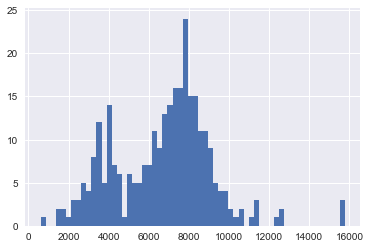

In [15]:
#Find number of genes expressed per cell and filter out cells that fail the cutoff.
genes_expr = df_master[df_master.Counts > 0].groupby('CellName')

namesAndCounts = []
justCounts = []
for name, group in genes_expr:
    namesAndCounts.append((name, group.count().Counts))
    justCounts.append(group.count().Counts)

gene_expression = plt.hist(justCounts, bins=60)



In [16]:
bad_cells_Genes = np.unique([x[0] for x in namesAndCounts if x[1] < 2000])
print("bad cells by low genes")
print(bad_cells_Genes)
print(namesAndCounts)

bad cells by low genes
['C4_B9_MiSeq.txt.gz' 'C4_C8_MiSeq.txt.gz' 'C5_C3.txt.gz' 'C5_F6.txt.gz'
 'C5_H3.txt.gz']
[('C1_A1.txt.gz', 10101), ('C1_A2.txt.gz', 8064), ('C1_A4.txt.gz', 7494), ('C1_A5.txt.gz', 8233), ('C1_B3.txt.gz', 7394), ('C1_B4.txt.gz', 7616), ('C1_B5.txt.gz', 8325), ('C1_B6.txt.gz', 3209), ('C1_C3.txt.gz', 7806), ('C1_C4.txt.gz', 4083), ('C1_D1.txt.gz', 8020), ('C1_D2.txt.gz', 6955), ('C1_D3.txt.gz', 7882), ('C1_D4.txt.gz', 7615), ('C1_D5.txt.gz', 7001), ('C1_D6.txt.gz', 12529), ('C1_E1.txt.gz', 4388), ('C1_E2.txt.gz', 7512), ('C1_E3.txt.gz', 3199), ('C1_E4.txt.gz', 7217), ('C1_E6.txt.gz', 12480), ('C1_F1.txt.gz', 7654), ('C1_F2.txt.gz', 6235), ('C1_F3.txt.gz', 2351), ('C1_F4.txt.gz', 6743), ('C1_F5.txt.gz', 6176), ('C1_F6.txt.gz', 12582), ('C1_G1.txt.gz', 8522), ('C1_G2.txt.gz', 7817), ('C1_G3.txt.gz', 7814), ('C1_H1.txt.gz', 4951), ('C1_H2.txt.gz', 7682), ('C1_H3.txt.gz', 8003), ('C1_H5.txt.gz', 7184), ('C2_A1.txt.gz', 8950), ('C2_A2.txt.gz', 6883), ('C2_A3.txt.gz', 8

In [17]:
#Pull out EC rows into a new df.
EC_rows = df_master[df_master.GeneID.str.contains(r"EC\w+")]

In [19]:
?print

In [22]:
#Sum of EC counts. Grouped by 3 EC transcripts.
group_sum_ECs = EC_rows.groupby('CellName').sum()
print(group_sum_ECs)

              Length   Counts
CellName                     
C1_A1.txt.gz    3276    48258
C1_A2.txt.gz    3276    73152
C1_A4.txt.gz    3276    56630
C1_A5.txt.gz    3276    75147
C1_B3.txt.gz    3276    89341
C1_B4.txt.gz    3276    72309
C1_B5.txt.gz    3276     7220
C1_B6.txt.gz    3276   833774
C1_C3.txt.gz    3276    73745
C1_C4.txt.gz    3276  1079093
C1_D1.txt.gz    3276   185117
C1_D2.txt.gz    3276   124217
C1_D3.txt.gz    3276   103130
C1_D4.txt.gz    3276   103449
C1_D5.txt.gz    3276    35070
C1_D6.txt.gz    3276  1093036
C1_E1.txt.gz    3276   640435
C1_E2.txt.gz    3276    73049
C1_E3.txt.gz    3276  1039300
C1_E4.txt.gz    3276    91920
C1_E6.txt.gz    3276  1098407
C1_F1.txt.gz    3276   187179
C1_F2.txt.gz    3276   234685
C1_F3.txt.gz    3276   976211
C1_F4.txt.gz    3276   313476
C1_F5.txt.gz    3276   183258
C1_F6.txt.gz    3276  1197697
C1_G1.txt.gz    3276   119241
C1_G2.txt.gz    3276   104381
C1_G3.txt.gz    3276    71387
...              ...      ...
C5_C5.txt.

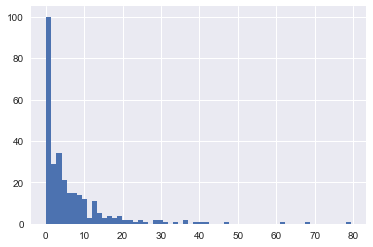

In [24]:
#Percent spike calculation and histogram
percentSpike=(group_sum_ECs.iloc[:,1]/sum_of_counts)*100
ecSpike_hist = plt.hist(percentSpike, bins=60)

In [25]:
#Percent spike cutoff
bad_cells_ECS = percentSpike > 40
print(bad_cells_ECS)

CellName
C1_A1.txt.gz    False
C1_A2.txt.gz    False
C1_A4.txt.gz    False
C1_A5.txt.gz    False
C1_B3.txt.gz    False
C1_B4.txt.gz    False
C1_B5.txt.gz    False
C1_B6.txt.gz     True
C1_C3.txt.gz    False
C1_C4.txt.gz     True
C1_D1.txt.gz    False
C1_D2.txt.gz    False
C1_D3.txt.gz    False
C1_D4.txt.gz    False
C1_D5.txt.gz    False
C1_D6.txt.gz    False
C1_E1.txt.gz    False
C1_E2.txt.gz    False
C1_E3.txt.gz     True
C1_E4.txt.gz    False
C1_E6.txt.gz    False
C1_F1.txt.gz    False
C1_F2.txt.gz    False
C1_F3.txt.gz     True
C1_F4.txt.gz    False
C1_F5.txt.gz    False
C1_F6.txt.gz    False
C1_G1.txt.gz    False
C1_G2.txt.gz    False
C1_G3.txt.gz    False
                ...  
C5_C5.txt.gz    False
C5_C6.txt.gz    False
C5_D1.txt.gz    False
C5_D2.txt.gz    False
C5_D3.txt.gz    False
C5_D4.txt.gz    False
C5_D5.txt.gz    False
C5_D6.txt.gz    False
C5_E1.txt.gz    False
C5_E2.txt.gz    False
C5_E3.txt.gz    False
C5_E4.txt.gz    False
C5_E5.txt.gz    False
C5_E6.txt.gz     True
C

In [30]:
#Create master bad list for all 3 QC metrics. These are the cells you want to remove.
bad_cells_ECS
print(bad_cells_Genes)
bad_cells_byCount
print(bad_cells_ECS.sum())
both = bad_cells_byCount | bad_cells_ECS

masterBadList = np.unique(both[both == True].index.tolist() + bad_cells_Genes.tolist())
print(masterBadList)

['C4_B9_MiSeq.txt.gz' 'C4_C8_MiSeq.txt.gz' 'C5_C3.txt.gz' 'C5_F6.txt.gz'
 'C5_H3.txt.gz']
5
['C1_B6.txt.gz' 'C1_C4.txt.gz' 'C1_E3.txt.gz' 'C1_F3.txt.gz'
 'C4_B9_MiSeq.txt.gz' 'C4_C8_MiSeq.txt.gz' 'C5_C3.txt.gz' 'C5_E6.txt.gz'
 'C5_F6.txt.gz' 'C5_H3.txt.gz']


In [31]:
#Good master list with bad cells removed
df_master2 = df_master[~df_master['CellName'].isin(masterBadList)]
df_master2

,CellName,GeneID,Length,Counts
0,C1_A1.txt.gz,4933401J01Rik,1070,0
1,C1_A1.txt.gz,Gm26206,110,0
2,C1_A1.txt.gz,Xkr4,6094,214
3,C1_A1.txt.gz,Gm18956,480,0
4,C1_A1.txt.gz,Gm37180,2819,454
5,C1_A1.txt.gz,Gm37363,2233,706
6,C1_A1.txt.gz,Gm37686,2309,0
7,C1_A1.txt.gz,Gm1992,250,0
8,C1_A1.txt.gz,Gm37329,2057,0
9,C1_A1.txt.gz,Gm7341,926,0


In [32]:
#Pull out EC transcripts in each cell
EC_genes = df_master2[df_master2.GeneID.str.contains(r"EC\w+")]
EC_genes

,CellName,GeneID,Length,Counts
52125,C1_A1.txt.gz,EC2,775,45227
52126,C1_A1.txt.gz,EC15,1027,2862
52127,C1_A1.txt.gz,EC18,1474,169
104253,C1_A2.txt.gz,EC2,775,66718
104254,C1_A2.txt.gz,EC15,1027,5639
104255,C1_A2.txt.gz,EC18,1474,795
156381,C1_A4.txt.gz,EC2,775,52221
156382,C1_A4.txt.gz,EC15,1027,3697
156383,C1_A4.txt.gz,EC18,1474,712
208509,C1_A5.txt.gz,EC2,775,70154


In [33]:
#drop 1st EC transcript
dropEC2 = df_master2[df_master2.GeneID != 'EC2']
dropEC2

,CellName,GeneID,Length,Counts
0,C1_A1.txt.gz,4933401J01Rik,1070,0
1,C1_A1.txt.gz,Gm26206,110,0
2,C1_A1.txt.gz,Xkr4,6094,214
3,C1_A1.txt.gz,Gm18956,480,0
4,C1_A1.txt.gz,Gm37180,2819,454
5,C1_A1.txt.gz,Gm37363,2233,706
6,C1_A1.txt.gz,Gm37686,2309,0
7,C1_A1.txt.gz,Gm1992,250,0
8,C1_A1.txt.gz,Gm37329,2057,0
9,C1_A1.txt.gz,Gm7341,926,0


In [34]:
#drop 2nd EC transcript
dropEC2_15 = dropEC2[dropEC2.GeneID != 'EC15']
dropEC2_15

,CellName,GeneID,Length,Counts
0,C1_A1.txt.gz,4933401J01Rik,1070,0
1,C1_A1.txt.gz,Gm26206,110,0
2,C1_A1.txt.gz,Xkr4,6094,214
3,C1_A1.txt.gz,Gm18956,480,0
4,C1_A1.txt.gz,Gm37180,2819,454
5,C1_A1.txt.gz,Gm37363,2233,706
6,C1_A1.txt.gz,Gm37686,2309,0
7,C1_A1.txt.gz,Gm1992,250,0
8,C1_A1.txt.gz,Gm37329,2057,0
9,C1_A1.txt.gz,Gm7341,926,0


In [35]:
#Create df with only endogenous genes. EC genes removed. Drop last EC transcript.
endog_genes_df = dropEC2_15[dropEC2_15.GeneID != 'EC18']
endog_genes_df

,CellName,GeneID,Length,Counts
0,C1_A1.txt.gz,4933401J01Rik,1070,0
1,C1_A1.txt.gz,Gm26206,110,0
2,C1_A1.txt.gz,Xkr4,6094,214
3,C1_A1.txt.gz,Gm18956,480,0
4,C1_A1.txt.gz,Gm37180,2819,454
5,C1_A1.txt.gz,Gm37363,2233,706
6,C1_A1.txt.gz,Gm37686,2309,0
7,C1_A1.txt.gz,Gm1992,250,0
8,C1_A1.txt.gz,Gm37329,2057,0
9,C1_A1.txt.gz,Gm7341,926,0


In [36]:
#RPK calculation
RPK_values = (endog_genes_df.Counts/endog_genes_df.Length)
RPK_values

0           0.000000
1           0.000000
2           0.035117
3           0.000000
4           0.161050
5           0.316167
6           0.000000
7           0.000000
8           0.000000
9           0.000000
10          0.000000
11          0.022093
12          0.000000
13          0.000000
14          0.000000
15          0.000000
16          0.000000
17          0.000000
18          0.000000
19          0.000000
20          0.000000
21          0.000000
22          0.000000
23          0.000000
24          0.000000
25          0.000000
26          0.000000
27          0.000000
28          0.000000
29          0.000000
              ...   
15429855    0.000000
15429856    0.000000
15429857    0.000000
15429858    0.000000
15429859    0.000000
15429860    0.000000
15429861    0.000000
15429862    0.000000
15429863    0.000000
15429864    0.000000
15429865    0.000000
15429866    0.000000
15429867    0.000000
15429868    0.000000
15429869    0.000000
15429870    0.000000
15429871    0

In [37]:
#bind RPK values to dataframe. RPK values are for each gene in each cell.
endog_genes_df_inter = endog_genes_df #.merge(RPK_values.to_frame(), left_index=True, right_index=True)
endog_genes_df_inter['RPK'] = RPK_values.to_frame()
endog_genes_df_inter

C:\Users\anbra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CellName,GeneID,Length,Counts,RPK
0,C1_A1.txt.gz,4933401J01Rik,1070,0,0.000000
1,C1_A1.txt.gz,Gm26206,110,0,0.000000
2,C1_A1.txt.gz,Xkr4,6094,214,0.035117
3,C1_A1.txt.gz,Gm18956,480,0,0.000000
4,C1_A1.txt.gz,Gm37180,2819,454,0.161050
5,C1_A1.txt.gz,Gm37363,2233,706,0.316167
6,C1_A1.txt.gz,Gm37686,2309,0,0.000000
7,C1_A1.txt.gz,Gm1992,250,0,0.000000
8,C1_A1.txt.gz,Gm37329,2057,0,0.000000
9,C1_A1.txt.gz,Gm7341,926,0,0.000000


In [38]:
#Sum of RPKs for each cells
sum_of_RPKs = endog_genes_df_inter.groupby('CellName').RPK.sum()
print(sum_of_RPKs)

CellName
C1_A1.txt.gz     831.116797
C1_A2.txt.gz     597.877003
C1_A4.txt.gz     517.280452
C1_A5.txt.gz     610.082692
C1_B3.txt.gz     637.983896
C1_B4.txt.gz     522.079047
C1_B5.txt.gz     121.410577
C1_C3.txt.gz     653.398978
C1_D1.txt.gz    1159.573115
C1_D2.txt.gz     588.538347
C1_D3.txt.gz     940.176381
C1_D4.txt.gz     717.831989
C1_D5.txt.gz     249.772064
C1_D6.txt.gz    1748.075432
C1_E1.txt.gz     659.656529
C1_E2.txt.gz     536.519487
C1_E4.txt.gz     598.025141
C1_E6.txt.gz    1718.182138
C1_F1.txt.gz    1174.298222
C1_F2.txt.gz     941.658572
C1_F4.txt.gz     654.513397
C1_F5.txt.gz     538.168125
C1_F6.txt.gz    1869.263232
C1_G1.txt.gz    1048.411658
C1_G2.txt.gz     819.835239
C1_G3.txt.gz     601.750244
C1_H1.txt.gz     928.549760
C1_H2.txt.gz    1082.263890
C1_H3.txt.gz     675.920965
C1_H5.txt.gz     472.380039
                   ...     
C5_C1.txt.gz      66.663415
C5_C2.txt.gz      73.725567
C5_C4.txt.gz     114.552358
C5_C5.txt.gz      56.976327
C5_C6.txt.g

In [39]:
scaling_factor = sum_of_RPKs/1e6
sf_dict = scaling_factor.to_dict()
print(scaling_factor.to_dict())

{'C1_A1.txt.gz': 0.00083111679714270624, 'C1_A2.txt.gz': 0.00059787700309048384, 'C1_A4.txt.gz': 0.00051728045216696409, 'C1_A5.txt.gz': 0.00061008269168675319, 'C1_B3.txt.gz': 0.00063798389618209626, 'C1_B4.txt.gz': 0.00052207904708397566, 'C1_B5.txt.gz': 0.00012141057728609733, 'C1_C3.txt.gz': 0.00065339897828284137, 'C1_D1.txt.gz': 0.0011595731146788562, 'C1_D2.txt.gz': 0.00058853834668302625, 'C1_D3.txt.gz': 0.00094017638148433027, 'C1_D4.txt.gz': 0.00071783198898933253, 'C1_D5.txt.gz': 0.00024977206377324801, 'C1_D6.txt.gz': 0.0017480754320788304, 'C1_E1.txt.gz': 0.00065965652945095183, 'C1_E2.txt.gz': 0.00053651948664308049, 'C1_E4.txt.gz': 0.00059802514120655011, 'C1_E6.txt.gz': 0.0017181821382969242, 'C1_F1.txt.gz': 0.0011742982220446945, 'C1_F2.txt.gz': 0.00094165857164608339, 'C1_F4.txt.gz': 0.00065451339740572054, 'C1_F5.txt.gz': 0.00053816812549724313, 'C1_F6.txt.gz': 0.0018692632322734517, 'C1_G1.txt.gz': 0.0010484116582438771, 'C1_G2.txt.gz': 0.00081983523854453069, 'C1_G

In [40]:
#Need to divide each RPK for each gene in each cell by the per cell scaling factor. Not the same length.
endog_genes_df_inter['ScalingFactor'] = endog_genes_df_inter['CellName'].apply(lambda x: sf_dict[x])
endog_genes_df_inter['TPM'] = endog_genes_df_inter.RPK/endog_genes_df_inter.ScalingFactor
jj = endog_genes_df_inter.TPM.tolist()
len([x for x in jj if x >= 1.0])

C:\Users\anbra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anbra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1594696

In [41]:
counts_matrix = endog_genes_df_inter.pivot_table(index='GeneID', columns='CellName', values='TPM', fill_value=0)
counts_matrix

CellName,C1_A1.txt.gz,C1_A2.txt.gz,C1_A4.txt.gz,C1_A5.txt.gz,C1_B3.txt.gz,C1_B4.txt.gz,C1_B5.txt.gz,C1_C3.txt.gz,C1_D1.txt.gz,C1_D2.txt.gz,...,C5_F5.txt.gz,C5_G1.txt.gz,C5_G2.txt.gz,C5_G3.txt.gz,C5_G4.txt.gz,C5_G5.txt.gz,C5_H1.txt.gz,C5_H2.txt.gz,C5_H4.txt.gz,C5_H5.txt.gz
GeneID,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0.000000,15.404772,0.000000,0.000000,0.000000,0.000000,0.000000,0.427144,0.000000,0.000000,...,8.504967,0.000000,5.950021,0.000000,0.000000,0.000000,0.000000,26.297000,0.000000,0.000000
0610006L08Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610007P14Rik,57.389956,90.047069,32.409988,66.571191,0.000000,38.896343,70.015237,7.227667,0.407266,0.802420,...,0.000000,0.000000,70.475783,9.577167,0.000000,0.000000,0.000000,18.540368,0.000000,0.000000
0610009B22Rik,91.626478,62.009658,77.482457,73.908309,21.988104,514.360949,66.024166,171.754858,184.056401,0.000000,...,183.206193,0.000000,331.105541,91.441314,0.000000,415.445502,672.046577,0.000000,0.000000,0.000000
0610009E02Rik,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.884775,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009L18Rik,7.775123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0610009O20Rik,3.503495,9.044760,15.278935,8.863805,16.300309,1.593526,0.000000,0.636630,6.457136,136.410588,...,0.000000,11.885820,0.000000,0.000000,142.551520,0.000000,0.000000,6.532318,0.000000,8.208564
0610010F05Rik,73.674723,148.503513,165.722907,23.523566,132.869287,10.628998,39.401620,169.855705,245.217391,77.380724,...,0.000000,205.033813,30.595471,73.730076,598.726346,43.274670,25.667910,405.663682,0.000000,67.968038
0610010K14Rik,5.711394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.367832,0.000000,...,0.000000,0.000000,0.000000,53.480093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
counts_matrix.to_csv("C:/Users/anbra/Desktop/Single_Cell_MNTB/Data/CellFilter_EndogGenes_TCsPresent.csv", sep = '\t')